<a href="https://colab.research.google.com/github/Samat010/login_page/blob/main/INF_395_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

df = spark.read.csv('/content/events.csv', header=True, inferSchema=True)


# Новый раздел

In [4]:
df_pd = df.toPandas()
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_odsp        941009 non-null  object
 1   id_event       941009 non-null  object
 2   sort_order     941009 non-null  int32 
 3   time           941009 non-null  int32 
 4   text           941009 non-null  object
 5   event_type     941009 non-null  int32 
 6   event_type2    941009 non-null  object
 7   side           941009 non-null  int32 
 8   event_team     941009 non-null  object
 9   opponent       941009 non-null  object
 10  player         940745 non-null  object
 11  player2        941006 non-null  object
 12  player_in      941009 non-null  object
 13  player_out     941009 non-null  object
 14  shot_place     941009 non-null  object
 15  shot_outcome   941009 non-null  object
 16  is_goal        941009 non-null  int32 
 17  location       941009 non-null  object
 18  body

In [5]:
df_pd

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12,2,Hamburg SV,Borussia Dortmund,...,NA,NA,6,2,0,9,2,1,1,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NA,1,Borussia Dortmund,Hamburg SV,...,NA,NA,NA,NA,0,NA,NA,0,NA,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NA,1,Borussia Dortmund,Hamburg SV,...,NA,NA,NA,NA,0,NA,NA,0,NA,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NA,1,Borussia Dortmund,Hamburg SV,...,NA,NA,NA,NA,0,NA,NA,0,NA,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NA,2,Hamburg SV,Borussia Dortmund,...,NA,NA,NA,NA,0,2,NA,0,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NA,2,Sampdoria,Atalanta,...,NA,NA,NA,NA,0,2,NA,0,NA,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NA,2,Sampdoria,Atalanta,...,NA,NA,NA,NA,0,NA,NA,0,NA,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12,2,Sampdoria,Atalanta,...,NA,NA,8,2,0,9,1,1,3,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NA,1,Atalanta,Sampdoria,...,NA,NA,NA,NA,0,4,NA,0,NA,0


In [6]:
df_pd.isnull().sum()

,0
id_odsp,0
id_event,0
sort_order,0
time,0
text,0
event_type,0
event_type2,0
side,0
event_team,0
opponent,0


In [7]:
df1 = df.select('bodypart', 'shot_outcome', 'is_goal')

shoting_bodypart = df1.filter(
    (col('bodypart').isNotNull()) &
    (col('shot_outcome').isNotNull()) &
    (col('is_goal').isNotNull())
)
shoting_bodypart.show()

+--------+------------+-------+
|bodypart|shot_outcome|is_goal|
+--------+------------+-------+
|       2|           2|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|       1|           2|      0|
|      NA|          NA|      0|
|       2|           1|      1|
|       1|           3|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|       1|           3|      0|
|       1|           4|      0|
|      NA|          NA|      0|
+--------+------------+-------+
only showing top 20 rows



In [8]:
df2 = shoting_bodypart.groupBy('bodypart', 'shot_outcome','is_goal').count()
df2.show()

+--------+------------+-------+------+
|bodypart|shot_outcome|is_goal| count|
+--------+------------+-------+------+
|       2|           4|      0|  1283|
|       1|           1|      1| 12823|
|       1|          NA|      1|   628|
|       2|           1|      0| 17018|
|       2|          NA|      0|    11|
|       2|           1|      1|  6757|
|       1|           2|      0| 45358|
|       3|           3|      0|  3518|
|      NA|          NA|      0|711823|
|       3|           1|      0|  7929|
|       3|           2|      0| 20174|
|       1|           1|      0| 29251|
|       2|           3|      0| 18925|
|       1|           4|      0|  2193|
|       1|          NA|      0|    47|
|       3|           1|      1|  4236|
|       1|           3|      0| 31639|
|       2|           2|      0| 27295|
|       3|           4|      0|    99|
|       2|          NA|      1|     1|
+--------+------------+-------+------+
only showing top 20 rows



In [9]:
goals = df.filter(col("is_goal") == 1)
goals_by_team = goals.groupBy("event_team").count()
goals_by_team.orderBy(col("count").desc()).show()

+-------------------+-----+
|         event_team|count|
+-------------------+-----+
|          Barcelona|  586|
|        Real Madrid|  573|
|      Bayern Munich|  453|
|Paris Saint-Germain|  447|
|             Napoli|  403|
|           Juventus|  401|
|  Borussia Dortmund|  392|
|            AS Roma|  373|
|               Lyon|  355|
|    Atletico Madrid|  347|
|            Sevilla|  330|
|           AC Milan|  329|
|         Fiorentina|  321|
|           Valencia|  314|
|     Internazionale|  312|
|              Lazio|  309|
|   Bayer Leverkusen|  307|
|         Schalke 04|  293|
|        Montpellier|  289|
|      Real Sociedad|  286|
+-------------------+-----+
only showing top 20 rows



In [10]:
from pyspark.sql.functions import col, when


df2 = df2.withColumn(
    "bodypart_description",
    when(col("bodypart") == 1, "right foot")
    .when(col("bodypart") == 2, "left foot")
    .when(col("bodypart") == 3, "head")
    .otherwise("Unknown")
)

df2 = df2.withColumn(
    "shot_outcome_description",
    when(col("shot_outcome") == 1, "On target")
    .when(col("shot_outcome") == 2, "Off target")
    .when(col("shot_outcome") == 3, "Blocked")
    .when(col("shot_outcome") == 4, "Hit the bar")
    .otherwise("Unknown")
)

df2.show()

+--------+------------+-------+------+--------------------+------------------------+
|bodypart|shot_outcome|is_goal| count|bodypart_description|shot_outcome_description|
+--------+------------+-------+------+--------------------+------------------------+
|       2|           4|      0|  1283|           left foot|             Hit the bar|
|       1|           1|      1| 12823|          right foot|               On target|
|       1|          NA|      1|   628|          right foot|                 Unknown|
|       2|           1|      0| 17018|           left foot|               On target|
|       2|          NA|      0|    11|           left foot|                 Unknown|
|       2|           1|      1|  6757|           left foot|               On target|
|       1|           2|      0| 45358|          right foot|              Off target|
|       3|           3|      0|  3518|                head|                 Blocked|
|      NA|          NA|      0|711823|             Unknown|      

In [11]:
df21=df2.select('bodypart_description','shot_outcome_description','is_goal','count')
df22 = df21.filter(
    (col("bodypart_description") != "Unknown") &
    (col("shot_outcome_description") != "Unknown")
)
df22.show()

+--------------------+------------------------+-------+-----+
|bodypart_description|shot_outcome_description|is_goal|count|
+--------------------+------------------------+-------+-----+
|           left foot|             Hit the bar|      0| 1283|
|          right foot|               On target|      1|12823|
|           left foot|               On target|      0|17018|
|           left foot|               On target|      1| 6757|
|          right foot|              Off target|      0|45358|
|                head|                 Blocked|      0| 3518|
|                head|               On target|      0| 7929|
|                head|              Off target|      0|20174|
|          right foot|               On target|      0|29251|
|           left foot|                 Blocked|      0|18925|
|          right foot|             Hit the bar|      0| 2193|
|                head|               On target|      1| 4236|
|          right foot|                 Blocked|      0|31639|
|       

In [12]:
df22_pd = df22.toPandas()

goal = df22_pd.groupby(['bodypart_description','is_goal'])['count'].sum()
sum = df22_pd.groupby(['bodypart_description'])['count'].sum()
sum2 = df22_pd.groupby(['bodypart_description'])['count'].sum().sum()
percentage = goal / sum * 100
print(sum2)
print()
print(sum)
print()
print(sum/sum2)
print()
print(goal)
print()
print(percentage)


228498

bodypart_description
head           35956
left foot      71278
right foot    121264
Name: count, dtype: int64

bodypart_description
head          0.157358
left foot     0.311941
right foot    0.530700
Name: count, dtype: float64

bodypart_description  is_goal
head                  0           31720
                      1            4236
left foot             0           64521
                      1            6757
right foot            0          108441
                      1           12823
Name: count, dtype: int64

bodypart_description  is_goal
head                  0          88.218934
                      1          11.781066
left foot             0          90.520217
                      1           9.479783
right foot            0          89.425551
                      1          10.574449
Name: count, dtype: float64


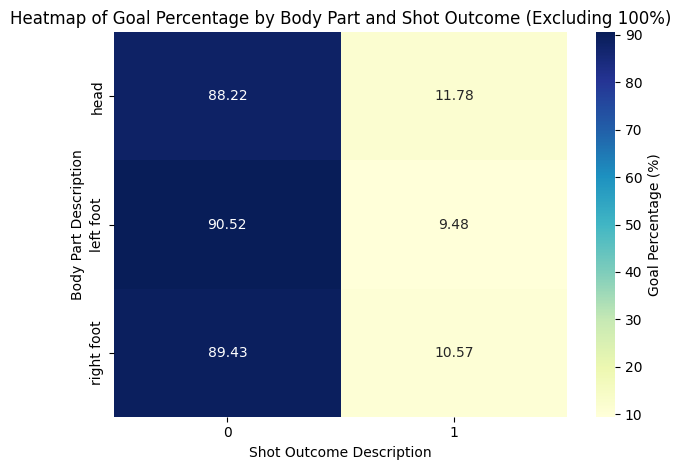

In [13]:
filtered_percentage = percentage[percentage != 100].unstack(fill_value=0)

sns.heatmap(filtered_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Goal Percentage (%)'})
plt.title('Heatmap of Goal Percentage by Body Part and Shot Outcome (Excluding 100%)')
plt.xlabel('Shot Outcome Description')
plt.ylabel('Body Part Description')
plt.tight_layout()
plt.show()

In [14]:
goal = df22_pd.groupby(['bodypart_description','shot_outcome_description','is_goal'])['count'].sum()
sum = df22_pd.groupby(['bodypart_description','shot_outcome_description'])['count'].sum()
percentage = goal / sum * 100
print(percentage)

bodypart_description  shot_outcome_description  is_goal
head                  Blocked                   0          100.000000
                      Hit the bar               0          100.000000
                      Off target                0          100.000000
                      On target                 0           65.178792
                                                1           34.821208
left foot             Blocked                   0          100.000000
                      Hit the bar               0          100.000000
                      Off target                0          100.000000
                      On target                 0           71.579390
                                                1           28.420610
right foot            Blocked                   0          100.000000
                      Hit the bar               0          100.000000
                      Off target                0          100.000000
                      On target   

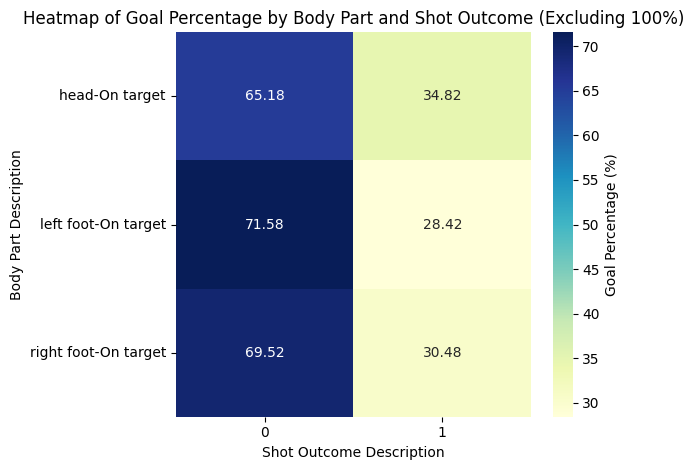

In [15]:
filtered_percentage = percentage[percentage != 100].unstack(fill_value=0)

sns.heatmap(filtered_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Goal Percentage (%)'})
plt.title('Heatmap of Goal Percentage by Body Part and Shot Outcome (Excluding 100%)')
plt.xlabel('Shot Outcome Description')
plt.ylabel('Body Part Description')
plt.tight_layout()
plt.show()

In [16]:
df.show()

+---------+----------+----------+----+--------------------+----------+-----------+----+-----------------+-----------------+-------------------+----------------+---------+----------+----------+------------+-------+--------+--------+-------------+---------+----------+
|  id_odsp|  id_event|sort_order|time|                text|event_type|event_type2|side|       event_team|         opponent|             player|         player2|player_in|player_out|shot_place|shot_outcome|is_goal|location|bodypart|assist_method|situation|fast_break|
+---------+----------+----------+----+--------------------+----------+-----------+----+-----------------+-----------------+-------------------+----------------+---------+----------+----------+------------+-------+--------+--------+-------------+---------+----------+
|UFot0hit/| UFot0hit1|         1|   2|Attempt missed. M...|         1|         12|   2|       Hamburg SV|Borussia Dortmund|      mladen petric|     gokhan tore|       NA|        NA|         6|       

In [17]:
df.show()

+---------+----------+----------+----+--------------------+----------+-----------+----+-----------------+-----------------+-------------------+----------------+---------+----------+----------+------------+-------+--------+--------+-------------+---------+----------+
|  id_odsp|  id_event|sort_order|time|                text|event_type|event_type2|side|       event_team|         opponent|             player|         player2|player_in|player_out|shot_place|shot_outcome|is_goal|location|bodypart|assist_method|situation|fast_break|
+---------+----------+----------+----+--------------------+----------+-----------+----+-----------------+-----------------+-------------------+----------------+---------+----------+----------+------------+-------+--------+--------+-------------+---------+----------+
|UFot0hit/| UFot0hit1|         1|   2|Attempt missed. M...|         1|         12|   2|       Hamburg SV|Borussia Dortmund|      mladen petric|     gokhan tore|       NA|        NA|         6|       

In [18]:
location_outcome = df.select(['location', 'shot_outcome','is_goal'])
location_outcome.show()

+--------+------------+-------+
|location|shot_outcome|is_goal|
+--------+------------+-------+
|       9|           2|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|       2|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|       2|          NA|      0|
|      NA|          NA|      0|
|      NA|          NA|      0|
|       4|          NA|      0|
|      15|           2|      0|
|      NA|          NA|      0|
|       9|           1|      1|
|      15|           3|      0|
|      NA|          NA|      0|
|       1|          NA|      0|
|      15|           3|      0|
|       3|           4|      0|
|      NA|          NA|      0|
+--------+------------+-------+
only showing top 20 rows



In [19]:
df3 = location_outcome.groupBy('location', 'shot_outcome','is_goal').count()
df3.show()

+--------+------------+-------+------+
|location|shot_outcome|is_goal| count|
+--------+------------+-------+------+
|      12|           1|      1|   702|
|       6|           1|      1|    43|
|      18|           1|      1|     4|
|      13|           2|      0|  1820|
|      18|           3|      0|    11|
|       3|           4|      0|   979|
|      14|           1|      0|   446|
|      15|           2|      0| 40532|
|      10|           1|      0|   769|
|      18|           4|      0|     6|
|      11|           3|      0|  4838|
|       8|           3|      0|   367|
|       8|           1|      1|   187|
|      11|           2|      0|  6732|
|       7|           3|      0|   393|
|       6|           2|      0|   590|
|       2|          NA|      0|125137|
|      15|           1|      1|  2555|
|       6|           1|      0|   573|
|       4|          NA|      0| 29669|
+--------+------------+-------+------+
only showing top 20 rows



In [20]:
df3.describe()

DataFrame[summary: string, location: string, shot_outcome: string, is_goal: string, count: string]

Data Analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [22]:
events = pd.read_csv('/content/events.csv')
info = pd.read_csv('/content/ginf.csv')

In [23]:
events = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')

In [24]:
shots = events[events.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()

<ipython-input-24-456007cae282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].str.title()
<ipython-input-24-456007cae282>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].str.title()
<ipython-input-24-456007cae282>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [25]:
pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

In [26]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

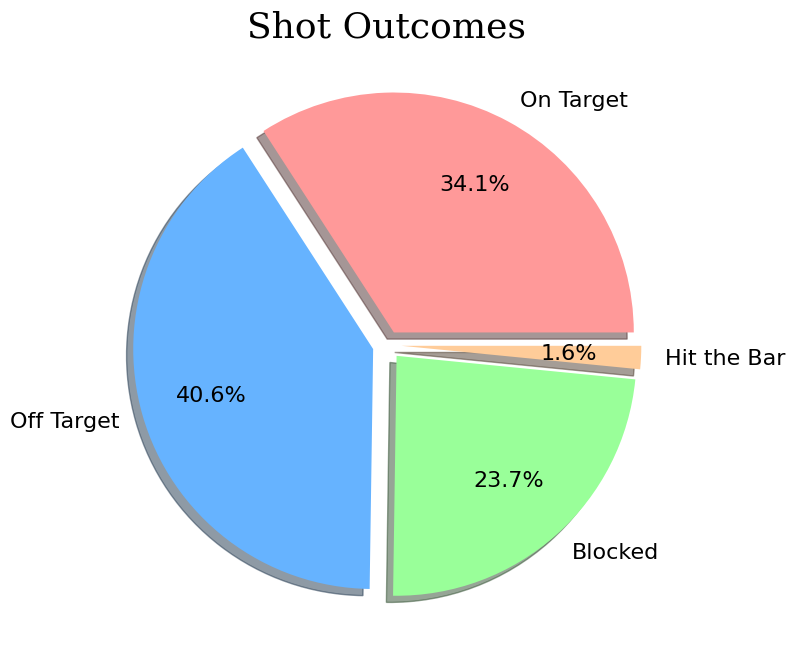

In [27]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [28]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

<ipython-input-29-9bfe44279c6e>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, size = 13)


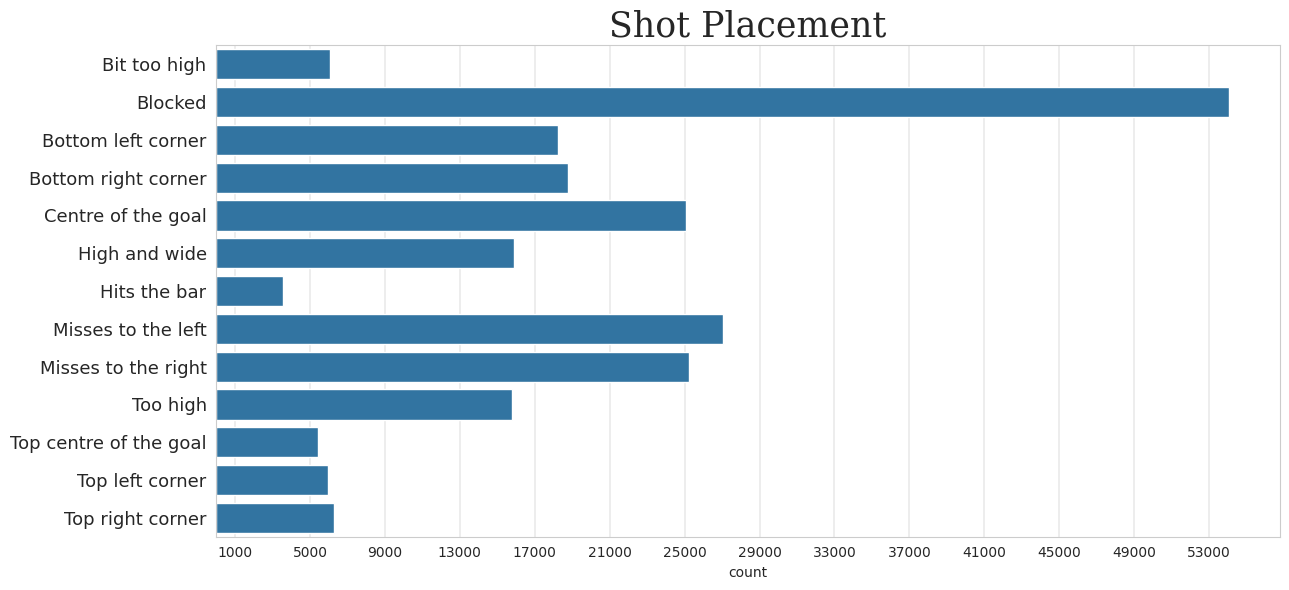

In [29]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [30]:
goals  = shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [31]:
goals['percentage']=0
for i in range(len(goals)):
    for country in goals.country.unique():
        if goals.iloc[i,goals.columns.get_loc("country")]==country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

<ipython-input-31-25d25c6ae63e>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8952583156404812' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \


In [32]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(p.get_height())
            ax.text(_x, _y+2, value, ha="center", fontsize=14)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<ipython-input-33-b9e8e55408db>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')


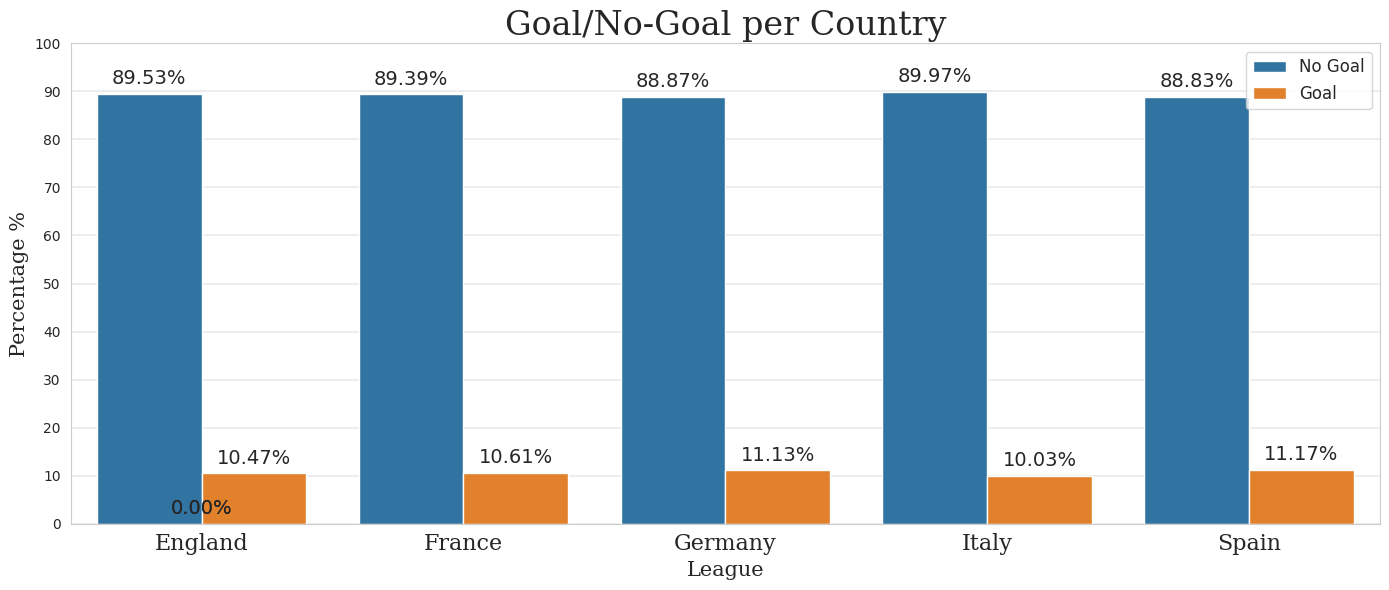

In [33]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [39]:
players.info()

NameError: name 'players' is not defined

In [40]:
df_pd = df.toPandas()
data_shot = df_pd[df_pd.event_type == 1]
data_shot = data_shot[data_shot.location != 19]
X = data_shot[['time', 'side', 'bodypart', 'location', 'situation', 'assist_method', 'fast_break']]
y = data_shot['is_goal']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print('XGBoost model precision on test dataset : ', model.score(X_test, y_test) * 100)

XGBoost model precision on test dataset :  91.10349793789688


In [43]:
data_shot.is_goal.value_counts()

,count
is_goal,
0,204694
1,24441


In [44]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_test, y_test)
score = dummy_clf.score(X_test, y_test)
print('most frequent precision : ', score * 100, '%')

most frequent precision :  89.33379885220504 %


In [45]:
probas = model.predict_proba(X)
data_shot['xgoalpercent'] = probas[:,1]

In [46]:
print('Maximum xG value for a shot : ', probas[:,1].max())
print('Minimum xG value for a shot : ', probas[:,1].min())

Maximum xG value for a shot :  0.9840541855756146
Minimum xG value for a shot :  0.007502991052742561


In [47]:
list_of_players = data_shot.player.unique()
print(list_of_players)

['mladen petric' 'shinji kagawa' 'kevin grosskreutz' ... 'alhassan wakaso'
 'roman zozulia' 'alessandro bastoni']


In [48]:
players = shots.groupby('player').sum().reset_index()
players.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players.expectedGoals = round(players.expectedGoals,2)
players.difference = round(players.difference,2)
players['ratio'] = players['trueGoals'] / players['expectedGoals']

AttributeError: 'DataFrame' object has no attribute 'expectedGoals'

In [49]:
print(round(players.expectedGoals.corr(players.trueGoals),3))

AttributeError: 'DataFrame' object has no attribute 'expectedGoals'